<a href="https://colab.research.google.com/github/ppn101/Projects/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#First i will import all the required libraries and functions in the file.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#Now i will import the csv file into a dataframe.
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/car data.csv")

In [3]:
#Now i will pass a command to get a sneak peak of the sample of the dataframe.
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [5]:
#Now i will check the basic structure of the dataframe - Number of rows and columns in the dataframe.
df.shape

(301, 9)

In [6]:
#Now i will obtain a high level statistical summary of the entire dataframe.
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
#Now i will see the categorical counts in the column - seller Type
df["Seller_Type"].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [8]:
#Now i will see the categorical counts in the column - Fuel Type
df["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [9]:
#Now i will see the categorical counts in the column - Transmission
df["Transmission"].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [10]:
#Now i will see the categorical counts in the column - Car Name
df["Car_Name"].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [11]:
#Now i will see the Data type and null counts of each column in the entire dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
#Now i will check the number of missing values in the dataframe
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
#Since some of the columns have categorical data and as it is not possible to build regression model on qualitative data hence, I will now convert categorical data into numerical data.
df.replace({"Fuel_Type": {"Petrol":0, "Diesel":1, "CNG":2}, "Transmission": {"Manual":0, "Automatic":1}, "Seller_Type": {"Dealer":0, "Individual":1}}, inplace = True)

In [17]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0


In [26]:
 #Since the column - car name contains categorical data hence, need to drop it before proceeding.
df_dropped = df.drop("Car_Name", axis = 1)

In [27]:
df_dropped.head(3)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0


In [42]:
#Since selling price is a the label which the model should predict hence, dropping it from the feature dataframe.
feature = df_dropped.drop("Selling_Price", axis = 1)

In [43]:
feature.head(3)

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0


In [44]:
#Since selling price is the label that needs to be predicted by the model hence, i will store it in a seperate dataframe.
label = df["Selling_Price"]

In [45]:
label.head(3)

0    3.35
1    4.75
2    7.25
Name: Selling_Price, dtype: float64

In [46]:
#Now i will split the data into training data and testing data.
feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size= 0.1, random_state = 1)

In [47]:
#Now i will check the shape of the resultant dataframes after splitting.
print(feature_train.shape)
print(feature_test.shape)
print(label_train.shape)
print(label_test.shape)

(270, 7)
(31, 7)
(270,)
(31,)


In [48]:
feature_train.head(3)

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
197,2010,0.51,33000,0,1,0,0
202,2015,5.70,28200,0,0,0,0
59,2014,35.96,41000,1,0,1,0


In [63]:
 #First i will run the model (Linear Regression) on training data
 model = LinearRegression()
 model.fit(feature_train, label_train)
 predict_train = model.predict(feature_train)
 lm_model_accuracy_train = metrics.r2_score(label_train, predict_train)
 print(round(lm_model_accuracy_train,2)*100)

89.0


In [64]:
#First i will run the model (Linear Regression) on test data
predict_test = model.predict(feature_test)
lm_model_accuracy_test = metrics.r2_score(label_test, predict_test)
print(round(lm_model_accuracy_test,2)*100)

39.0


Text(0.5, 1.0, 'Scatterplot between Actual and Predicted prices - Linear Regression')

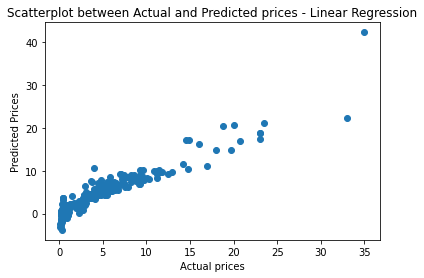

In [70]:
#Now i will plot the training data (Actual vs Predicted price) on a scatteplot
plt.scatter(label_train, predict_train)
plt.xlabel("Actual prices")
plt.ylabel("Predicted Prices")
plt.title("Scatterplot between Actual and Predicted prices - Linear Regression")

Text(0.5, 1.0, 'Scatterplot between Actual and Predicted prices - Linear Regression')

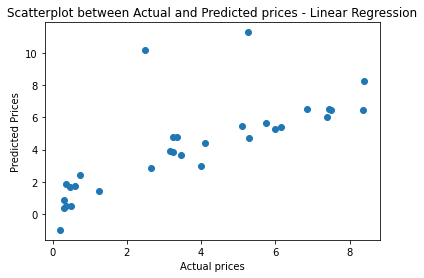

In [69]:
#Now i will plot the test data (Actual vs Predicted price) on a scatteplot
plt.scatter(label_test, predict_test)
plt.xlabel("Actual prices")
plt.ylabel("Predicted Prices")
plt.title("Scatterplot between Actual and Predicted prices - Linear Regression")

In [62]:
#Secondly i will run the model (Lasso) on training data
model2 = Lasso()
model2.fit(feature_train, label_train)
predict_train = model2.predict(feature_train)
l_model_accuracy_train = metrics.r2_score(label_train, predict_train)
print(round(l_model_accuracy_train,2)*100)

85.0


In [65]:
#Now i will run the model (Lasso) on test data
predict_test = model2.predict(feature_test)
l_model_accuracy_test = metrics.r2_score(label_test, predict_test)
print(round(l_model_accuracy_test,2)*100)

46.0
